In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import pandas as pd

# EPS 109 FA22 Final Project : Smaller Asteroid, Bigger Dinosaurs

# By: Darren Sun

Objectives : This final project models the Chicxulub asteroid's parameters as it struck the Earth's surface approximately 66 million years ago. The Chicxulub asteroid wiped out about 75% of life forms during the age of dinosaurs and was about 6.2 miles or 10 km wide. It had a mass of 10^15 kg and an impact energy of 2*10^23 Joules, causing global dust clouds and shock waves, fires, tsunamis, and a large crater off the coast of the Mexican Yucatan Peninsula. 

In part 1, I approximate impact velocity and acceleration parameters to model an impact velocity of 20000 m/s upon impact as was estimated of the actual Chicxulub asteroid. I then vary the mass of the asteroid to determine what mass of an asteroid would yield 5% of the original Chicxulub asteroid's impact energy. I found that an asteroid with a mass of 5 * 10^13 kg would yield 5% of Chicxulub's original impact energy, given it also impacts Earth at 20000m/s. The impact energy equation deployed was Leibniz's formula for kinetic energy, where KE = 1/2 * mv^2. The data was visualized in scatterplots, and the relationship was found to be linear. 

In part 2, I compare asteroid mass and impact energy against the resulting diameter of the crater. I converted the impact energy for each mass of asteroid into equivalent megatons of TNT in Joules and then deployed the formula 

Diameter of the crater(km) = 0.765 × (energy of impact in megatons TNT)^(1/3.4)

to find the resulting crater size. I also compared the impact energy for each specific asteroid mass to the energy equivalent of number of Hiroshima nuclear bombs. These data were visualized in line plots. 

In part 3, I analyzed how tidal wave heights would change according to distance from an aquatic point of impact of an asteroid, since 71% of the Earth is covered by bodies of water. The results were graphed out on superimposed line graphs for all of the individual masses of asteroids, and it was observed that the tidal wave height exponentially reduces with distance as distance from the epicenter increases. 


# Part 1: Relating Asteroid Impact Energy to Mass

[25000, 24000, 23000, 22000, 21000, 20000]


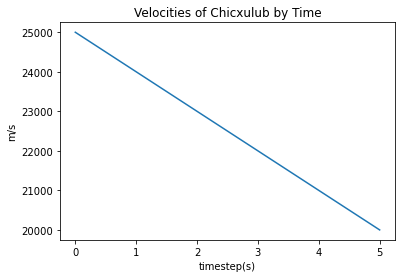

In [2]:
# Initial Parameters
initial_velocity_meterperssec = 25000
asteroidsize_arr = []
impactenergy_arr = []

# Factors that affect the velocity and acceleration of an asteroid include: air friction(drag), solar heating, gravity
# As such, for the purposes of simulation, we will assume that initial velocity is 25km/sec
# Chicxulub had an impact velocity of 20km/sec so we will simulate 5 seconds of flight before impact
# Note: Average asteroid velocity is 18km/sec

# V(T) = 25000 - 1000(T)
# A(T) = dV/dT = -1000 m/s^2

velocities_by_second = []

def velocities(time):
    return 25000 - 1000 * time 

for i in range(6):
    velocities_by_second.append(velocities(i))

plt.title('Velocities of Chicxulub by Time')
plt.ylabel('m/s')
plt.xlabel('timestep(s)')
plt.plot(velocities_by_second)

print(velocities_by_second)

In [3]:
# Calculate impact energy 
def kinetic_energy(mass, velocity):
    return 0.5 * mass * (velocity ** 2)

chicxulubMass_kg = 10 ** 15
chicxulubImpactEnergy = kinetic_energy(chicxulubMass_kg, 20000)

asteroidsize_arr.append(chicxulubMass_kg)
impactenergy_arr.append(chicxulubImpactEnergy)

print(asteroidsize_arr)
print(impactenergy_arr)

[1000000000000000]
[2e+23]


In [4]:
# impactenergy_index = 0
# mass = chicxulubMass_kg
# impact_E = kinetic_energy(mass, 20000)

# # Decrement Mass in 500kg
# while(impactenergy_arr[impactenergy_index] / chicxulubImpactEnergy > 0.05):
#     mass = mass - 10000
#     impact_E = kinetic_energy(mass, 20000)
#     asteroidsize_arr.append(mass)
#     impactenergy_arr.append(impact_E)
#     impactenergy_index += 1
    
# print(asteroidsize_arr)
# print(impactenergy_arr)

In [5]:
mass_arr = np.arange(10**15, 0, -((10**15)/20))
impact_E_arr = kinetic_energy(mass_arr, 20000)

In [6]:
d = {'Asteroid Mass(kg)': mass_arr, 'Impact Energy(J)': impact_E_arr}
df = pd.DataFrame(data=d)
df['Proportion of Impact Energy to Chicxulub'] = df['Impact Energy(J)'] / chicxulubImpactEnergy
df

Asteroid Mass(kg)  Impact Energy(J)  \
0        1.000000e+15      2.000000e+23   
1        9.500000e+14      1.900000e+23   
2        9.000000e+14      1.800000e+23   
3        8.500000e+14      1.700000e+23   
4        8.000000e+14      1.600000e+23   
5        7.500000e+14      1.500000e+23   
6        7.000000e+14      1.400000e+23   
7        6.500000e+14      1.300000e+23   
8        6.000000e+14      1.200000e+23   
9        5.500000e+14      1.100000e+23   
10       5.000000e+14      1.000000e+23   
11       4.500000e+14      9.000000e+22   
12       4.000000e+14      8.000000e+22   
13       3.500000e+14      7.000000e+22   
14       3.000000e+14      6.000000e+22   
15       2.500000e+14      5.000000e+22   
16       2.000000e+14      4.000000e+22   
17       1.500000e+14      3.000000e+22   
18       1.000000e+14      2.000000e+22   
19       5.000000e+13      1.000000e+22   

    Proportion of Impact Energy to Chicxulub  
0                                       1.00  
1                                       0.95  
2                                       0.90  
3                                       0.85  
4                                       0.80  
5                                       0.75  
6                                       0.70  
7                                       0.65  
8                                       0.60  
9                                       0.55  
10                                      0.50  
11                                      0.45  
12                                      0.40  
13                                      0.35  
14                                      0.30  
15                                      0.25  
16                                      0.20  
17                                      0.15  
18                                      0.10  
19                                      0.05

[Text(0.5, 1.0, 'Impact Energy')]

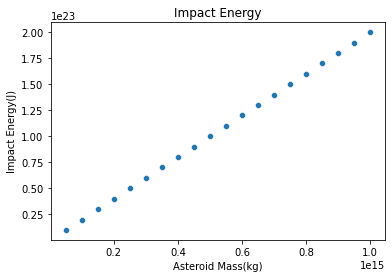

In [7]:
sns.scatterplot(data=df, x='Asteroid Mass(kg)', y='Impact Energy(J)').set(title="Impact Energy")

[Text(0.5, 1.0, 'Impact Energy Proportion to Chicxulub by Mass')]

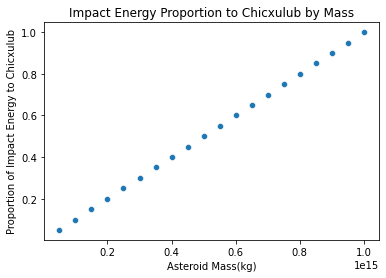

In [8]:
sns.scatterplot(data=df, x='Asteroid Mass(kg)', y='Proportion of Impact Energy to Chicxulub').set(title='Impact Energy Proportion to Chicxulub by Mass')

In [9]:
df['Proportion of Chicxulub Mass'] = df['Asteroid Mass(kg)'] / 10**15
df

Asteroid Mass(kg)  Impact Energy(J)  \
0        1.000000e+15      2.000000e+23   
1        9.500000e+14      1.900000e+23   
2        9.000000e+14      1.800000e+23   
3        8.500000e+14      1.700000e+23   
4        8.000000e+14      1.600000e+23   
5        7.500000e+14      1.500000e+23   
6        7.000000e+14      1.400000e+23   
7        6.500000e+14      1.300000e+23   
8        6.000000e+14      1.200000e+23   
9        5.500000e+14      1.100000e+23   
10       5.000000e+14      1.000000e+23   
11       4.500000e+14      9.000000e+22   
12       4.000000e+14      8.000000e+22   
13       3.500000e+14      7.000000e+22   
14       3.000000e+14      6.000000e+22   
15       2.500000e+14      5.000000e+22   
16       2.000000e+14      4.000000e+22   
17       1.500000e+14      3.000000e+22   
18       1.000000e+14      2.000000e+22   
19       5.000000e+13      1.000000e+22   

    Proportion of Impact Energy to Chicxulub  Proportion of Chicxulub Mass  
0                                       1.00                          1.00  
1                                       0.95                          0.95  
2                                       0.90                          0.90  
3                                       0.85                          0.85  
4                                       0.80                          0.80  
5                                       0.75                          0.75  
6                                       0.70                          0.70  
7                                       0.65                          0.65  
8                                       0.60                          0.60  
9                                       0.55                          0.55  
10                                      0.50                          0.50  
11                                      0.45                          0.45  
12                                      0.40                          0.40  
13                                      0.35                          0.35  
14                                      0.30                          0.30  
15                                      0.25                          0.25  
16                                      0.20                          0.20  
17                                      0.15                          0.15  
18                                      0.10                          0.10  
19                                      0.05                          0.05

Based on these findings, I can deduce that the relationship between an asteroid's mass and its impact energy are both linear, if we exclude external factors like an asteroid exploding in mid air, potential slowed velocities due to air friction, and assume that the asteroids come in at the same angle and rate of the original Chicxulub asteroid. When the asteroid's mass is 5% of Chicxulub's mass, it will also yield 5% of Chicxulub's original impact energy, calculated by the Leibniz formula for kinetic energy where 

As a result, I can conclude that the asteroid's impact energy in Joules is directly linearly dependent of its total mass in kg. In response to my original objective of finding the asteroid mass that yields 5% of Chicxulub's original impact energy, the mass of the asteroid is required to be strictly less than or equal to 5 * 10^13kg, which would yield a total kinetic energy at 20000m/s of 10^22 Joules. Chicxulub's estimated mass was 10^15kg, and at 20000m/s on impact this would have yielded 2 * 10^23 Joules of energy. To verify these numbers: 

In [10]:
print('An asteroid of mass 5 * 10^13kg is ' + str((5 * 10**13) / (10**15) * 100) + "% of Chicxulub's mass.")

An asteroid of mass 5 * 10^13kg is 5.0% of Chicxulub's mass.


In [11]:
print('An asteroid that yields 10^22 Joules of kinetic impact energy yields ' + str((10**22)/(2*10**23) * 100) + "% of Chicxulub's impact energy.")

An asteroid that yields 10^22 Joules of kinetic impact energy yields 5.0% of Chicxulub's impact energy.


# Pt 2: Relating Crater Diameter to Impact Energy

The energy of 1 million tons of TNT is: 
1 megaton of TNT = 4.2 × 10^15 Joules 

Diameter of the crater(km) = 0.765 × (energy of impact in megatons TNT)^(1/3.4)

In [12]:
def calculate_diameter(energy_column):
    return 0.765 * energy_column ** (1/3.4)

To put things into perspective, the nuclear bomb that exploded over Hiroshima had released a total energy of 1.5x10^13 joules. 

In [13]:
# Create new column for impact energy in units of megatons of TNT
df['Impact Energy in Megatons of TNT(J)'] = df['Impact Energy(J)'] / (4.2 * 10 ** 15)

# Generate a new column for the energy of each asteroid mass's energy in number of Hiroshima bombs
df['Number of Hiroshima Bombs Equivalent Energy'] = df['Impact Energy(J)'] / (1.5 * 10**13)

# Create a new column to get the diameter of the resulting crater
df['Diameter of Crater(km)'] = calculate_diameter(df['Impact Energy in Megatons of TNT(J)'])
df

Asteroid Mass(kg)  Impact Energy(J)  \
0        1.000000e+15      2.000000e+23   
1        9.500000e+14      1.900000e+23   
2        9.000000e+14      1.800000e+23   
3        8.500000e+14      1.700000e+23   
4        8.000000e+14      1.600000e+23   
5        7.500000e+14      1.500000e+23   
6        7.000000e+14      1.400000e+23   
7        6.500000e+14      1.300000e+23   
8        6.000000e+14      1.200000e+23   
9        5.500000e+14      1.100000e+23   
10       5.000000e+14      1.000000e+23   
11       4.500000e+14      9.000000e+22   
12       4.000000e+14      8.000000e+22   
13       3.500000e+14      7.000000e+22   
14       3.000000e+14      6.000000e+22   
15       2.500000e+14      5.000000e+22   
16       2.000000e+14      4.000000e+22   
17       1.500000e+14      3.000000e+22   
18       1.000000e+14      2.000000e+22   
19       5.000000e+13      1.000000e+22   

    Proportion of Impact Energy to Chicxulub  Proportion of Chicxulub Mass  \
0                                       1.00                          1.00   
1                                       0.95                          0.95   
2                                       0.90                          0.90   
3                                       0.85                          0.85   
4                                       0.80                          0.80   
5                                       0.75                          0.75   
6                                       0.70                          0.70   
7                                       0.65                          0.65   
8                                       0.60                          0.60   
9                                       0.55                          0.55   
10                                      0.50                          0.50   
11                                      0.45                          0.45   
12                                      0.40                          0.40   
13                                      0.35                          0.35   
14                                      0.30                          0.30   
15                                      0.25                          0.25   
16                                      0.20                          0.20   
17                                      0.15                          0.15   
18                                      0.10                          0.10   
19                                      0.05                          0.05   

    Impact Energy in Megatons of TNT(J)  \
0                          4.761905e+07   
1                          4.523810e+07   
2                          4.285714e+07   
3                          4.047619e+07   
4                          3.809524e+07   
5                          3.571429e+07   
6                          3.333333e+07   
7                          3.095238e+07   
8                          2.857143e+07   
9                          2.619048e+07   
10                         2.380952e+07   
11                         2.142857e+07   
12                         1.904762e+07   
13                         1.666667e+07   
14                         1.428571e+07   
15                         1.190476e+07   
16                         9.523810e+06   
17                         7.142857e+06   
18                         4.761905e+06   
19                         2.380952e+06   

    Number of Hiroshima Bombs Equivalent Energy  Diameter of Crater(km)  
0                                  1.333333e+10              138.622022  
1                                  1.266667e+10              136.546430  
2                                  1.200000e+10              134.392225  
3                                  1.133333e+10              132.151803  
4                                  1.066667e+10              129.816318  
5                                  1.000000e+10              127.375395  
6                                  9.33

[Text(0.5, 1.0, 'Crater Diameter vs Asteroid Mass')]

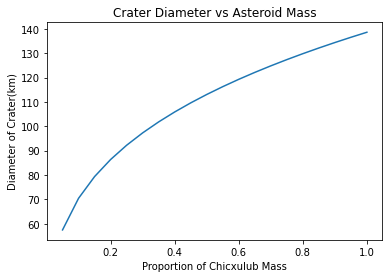

In [14]:
# Visualize the diameters of the crater against the mass of the asteroid
sns.lineplot(data=df, x='Proportion of Chicxulub Mass', y='Diameter of Crater(km)').set(title='Crater Diameter vs Asteroid Mass')

[Text(0.5, 1.0, 'Hiroshima Bomb Equivalent Energy vs Asteroid Mass')]

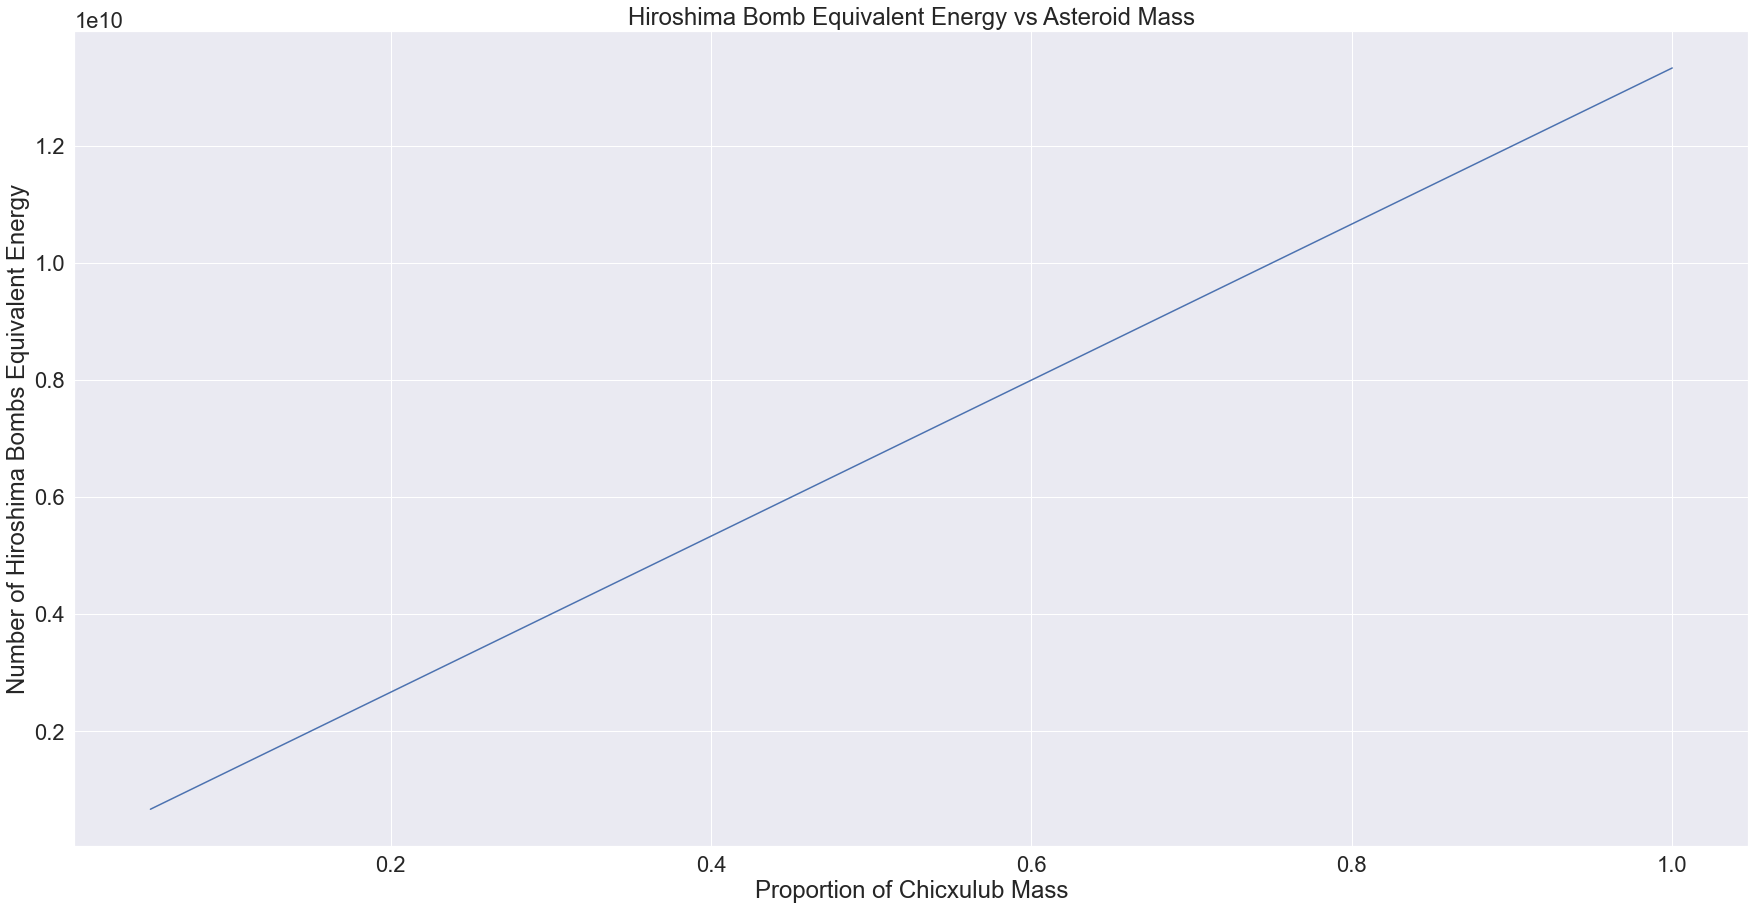

In [21]:
#Visualize the Hiroshima bomb equivalent energy against the mass of the asteroid
sns.set(font_scale=2)
sns.lineplot(data=df, x='Proportion of Chicxulub Mass', y='Number of Hiroshima Bombs Equivalent Energy').set(title='Hiroshima Bomb Equivalent Energy vs Asteroid Mass')

# Pt 3: Relating Tidal Wave Height to Distance from Impact

Because 71% of the Earth's surface is water, simulating asteroid impacts into ocean is also critical. 
For this, the equation relating impact energy to tsunami wave height and distance from impact is:

Tidal wave height(m) = 10.9 × (distance from impact in kilometers)^-0.717 × (energy of impact in megatons TNT)^0.495

In [16]:
#Create a new dataframe
df2 = df.drop(['Proportion of Impact Energy to Chicxulub', 'Number of Hiroshima Bombs Equivalent Energy', 'Diameter of Crater(km)'], axis=1)

In [17]:
def calculate_tidalwave_height(distance, impactenergy):
    return 10.9 * distance**(-0.717) * impactenergy**(0.495)

In [18]:
# Generate a column for 100km
df2['Tidal Wave Height(m) 100km From Impact'] = calculate_tidalwave_height(100, df2['Impact Energy in Megatons of TNT(J)'])

# Generate a column for 1000km
df2['Tidal Wave Height(m) 1000km From Impact'] = calculate_tidalwave_height(1000, df2['Impact Energy in Megatons of TNT(J)'])

# Generate a column for 2500km
df2['Tidal Wave Height(m) 2500km From Impact'] = calculate_tidalwave_height(2500, df2['Impact Energy in Megatons of TNT(J)'])

# Generate a column for 5000km
df2['Tidal Wave Height(m) 5000km From Impact'] = calculate_tidalwave_height(5000, df2['Impact Energy in Megatons of TNT(J)'])

# Generate a column for 10000km
df2['Tidal Wave Height(m) 10000km From Impact'] = calculate_tidalwave_height(10000, df2['Impact Energy in Megatons of TNT(J)'])

In [19]:
df2

Asteroid Mass(kg)  Impact Energy(J)  Proportion of Chicxulub Mass  \
0        1.000000e+15      2.000000e+23                          1.00   
1        9.500000e+14      1.900000e+23                          0.95   
2        9.000000e+14      1.800000e+23                          0.90   
3        8.500000e+14      1.700000e+23                          0.85   
4        8.000000e+14      1.600000e+23                          0.80   
5        7.500000e+14      1.500000e+23                          0.75   
6        7.000000e+14      1.400000e+23                          0.70   
7        6.500000e+14      1.300000e+23                          0.65   
8        6.000000e+14      1.200000e+23                          0.60   
9        5.500000e+14      1.100000e+23                          0.55   
10       5.000000e+14      1.000000e+23                          0.50   
11       4.500000e+14      9.000000e+22                          0.45   
12       4.000000e+14      8.000000e+22                          0.40   
13       3.500000e+14      7.000000e+22                          0.35   
14       3.000000e+14      6.000000e+22                          0.30   
15       2.500000e+14      5.000000e+22                          0.25   
16       2.000000e+14      4.000000e+22                          0.20   
17       1.500000e+14      3.000000e+22                          0.15   
18       1.000000e+14      2.000000e+22                          0.10   
19       5.000000e+13      1.000000e+22                          0.05   

    Impact Energy in Megatons of TNT(J)  \
0                          4.761905e+07   
1                          4.523810e+07   
2                          4.285714e+07   
3                          4.047619e+07   
4                          3.809524e+07   
5                          3.571429e+07   
6                          3.333333e+07   
7                          3.095238e+07   
8                          2.857143e+07   
9                          2.619048e+07   
10                         2.380952e+07   
11                         2.142857e+07   
12                         1.904762e+07   
13                         1.666667e+07   
14                         1.428571e+07   
15                         1.190476e+07   
16                         9.523810e+06   
17                         7.142857e+06   
18                         4.761905e+06   
19                         2.380952e+06   

    Tidal Wave Height(m) 100km From Impact  \
0                              2534.708067   
1                              2471.161514   
2                              2405.902310   
3                              2338.785083   
4                              2269.642685   
5                              2198.281335   
6                              2124.474276   
7                              2047.953345   
8                              1968.397551   
9                              1885.417259   
10                             1798.531710   
11                             1707.136081   
12                             1610.451472   
13                             1507.445532   
14                             1396.699469   
15                             1276.169178   
16                             1142.714649   
17                              991.044419   
18                              810.826524   
19                              575.331429   

    Tidal Wave Height(m) 1000km From Impact  \
0                                486.326514   
1                                474.134035   
2                                461.612956   
3                                448.735383   
4                                435.469247   
5                                421.777368   
6                                407.616238   
7                                392.934406   
8                                377.670285   
9                                361.749116   
10                               345.078657   
11                               32

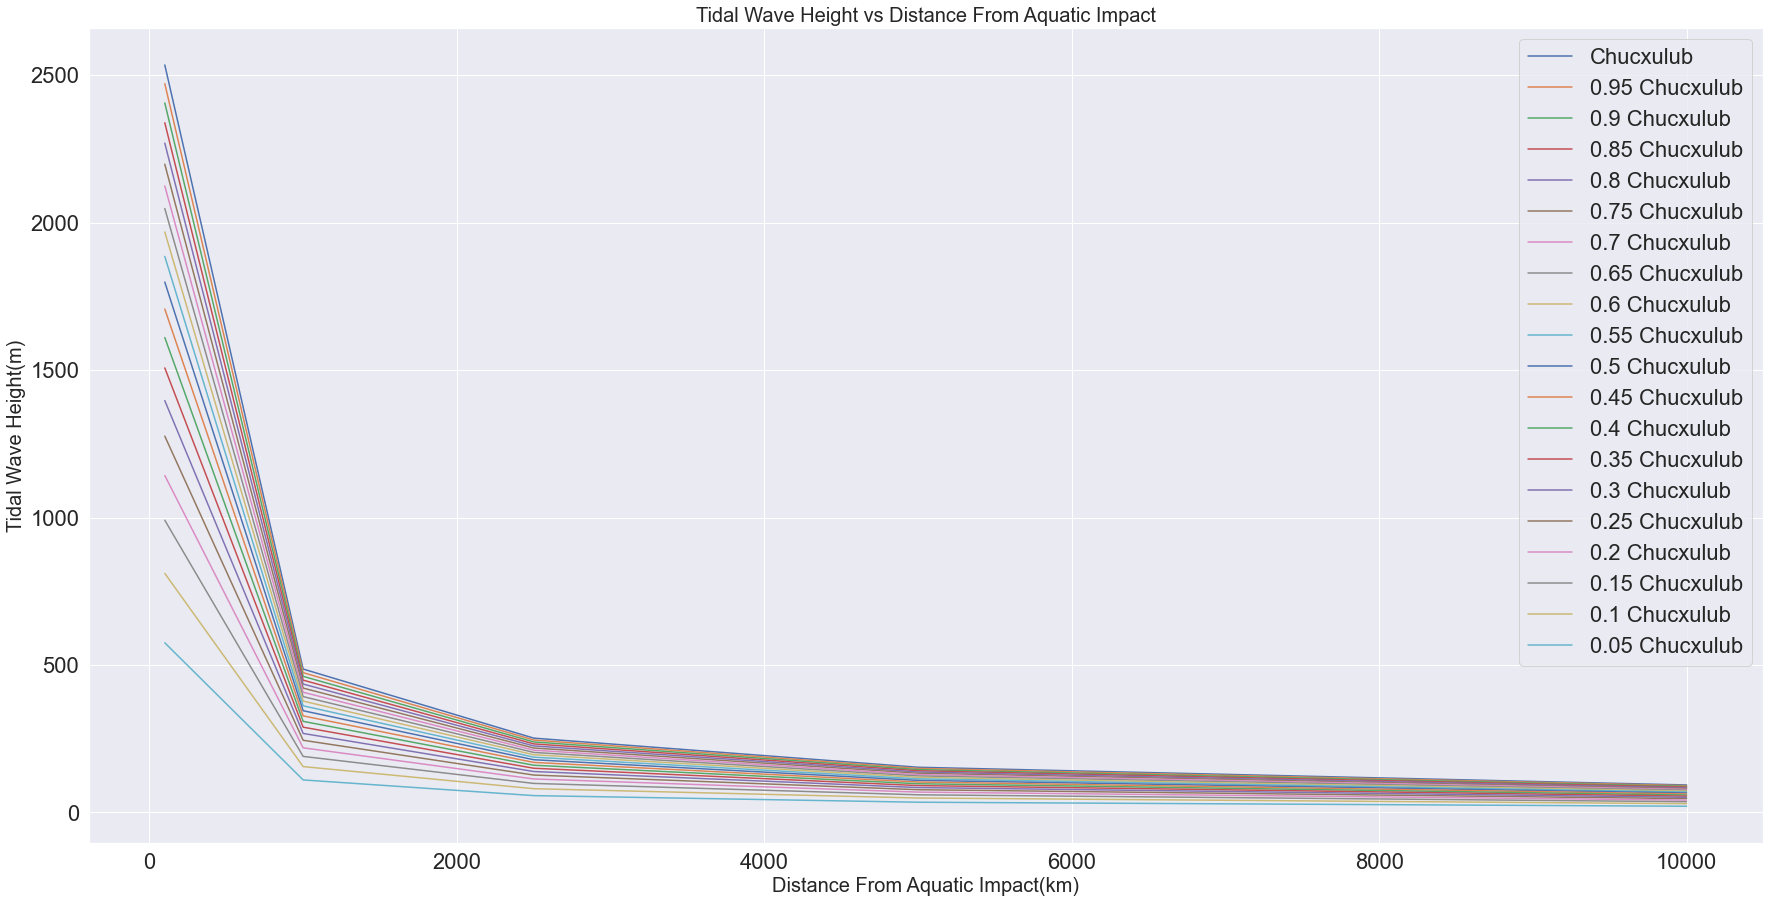

In [22]:
x_distances = [100, 1000, 2500, 5000, 10000]

plt.title('Tidal Wave Height vs Distance From Aquatic Impact', fontsize=20)
plt.xlabel('Distance From Aquatic Impact(km)', fontsize=20)
plt.ylabel('Tidal Wave Height(m)', fontsize=20)
plt.rcParams["figure.figsize"] = (30,15)
for i in range(20):
    plt.plot(x_distances, df2.iloc(0)[i][-5:])
classes = ['Chucxulub', 
           '0.95 Chucxulub', 
           '0.9 Chucxulub',
           '0.85 Chucxulub',
           '0.8 Chucxulub',
           '0.75 Chucxulub',
           '0.7 Chucxulub',
           '0.65 Chucxulub',
           '0.6 Chucxulub',
           '0.55 Chucxulub',
           '0.5 Chucxulub',
           '0.45 Chucxulub',
           '0.4 Chucxulub',
           '0.35 Chucxulub',
           '0.3 Chucxulub',
           '0.25 Chucxulub',
           '0.2 Chucxulub',
           '0.15 Chucxulub',
           '0.1 Chucxulub',
           '0.05 Chucxulub',
          ]
plt.legend(labels=classes)
plt.show()